# Exploratory Data Analysis <a class="anchor"><a id='PVA'></a></b><br>
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

In [1]:
#pip install pandas ydata-profiling numpy matplotlib seaborn openpyxl scikit-learn
#pip install -U ydata-profiling
#pip install -U openpyxl
#pip install -U plotly

In [2]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math

In [3]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")

In [4]:
# 1. Initial Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [5]:
data.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 2. Identificar valores nulos e os hífens
missing_values = data.isnull().sum()

hyphen_counts = (data == '-').sum()

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Hyphen Values': hyphen_counts
})

missing_summary


,Missing Values,Hyphen Values
customer_id,0,0
customer_region,0,442
customer_age,727,0
vendor_count,0,0
product_count,0,0
is_chain,0,0
first_order,106,0
last_order,0,0
last_promo,0,16748
payment_method,0,0


In [7]:
# 3. Descriptive Statistical Analysis
print(data.describe())

       customer_age  vendor_count  product_count      is_chain   first_order  \
count  31161.000000  31888.000000   31888.000000  31888.000000  31782.000000   
mean      27.506499      3.102609       5.668245      2.818866     28.478604   
std        7.160898      2.771587       6.957287      3.977529     24.109086   
min       15.000000      0.000000       0.000000      0.000000      0.000000   
25%       23.000000      1.000000       2.000000      1.000000      7.000000   
50%       26.000000      2.000000       3.000000      2.000000     22.000000   
75%       31.000000      4.000000       7.000000      3.000000     45.000000   
max       80.000000     41.000000     269.000000     83.000000     90.000000   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000  31888.000000   31888.000000  31888.000000   
mean      63.675521      4.880438      9.960451       2.300633      0.801163   
std       23.226123     11.654018     2

In [8]:
data.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [9]:
#Alterção das variáveis de object para category
data['last_promo'] = data['last_promo'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')
data['customer_region'] = data['customer_region'].astype('category')


In [10]:
category_var = ['customer_region', 'last_promo', 'payment_method']

In [11]:
number_var = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 
              'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
              'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
              'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 
              'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
              'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 
              'HR_21', 'HR_22', 'HR_23']

In [12]:
# Filter the columns that are numeric and present in the dataset
numeric_columns = [col for col in number_var if col in data.columns]

# Calculate the desired statistics
summary_stats = data[numeric_columns].describe().T[['mean', '50%', 'std', 'min', 'max']]
summary_stats.columns = ['mean', 'median', 'std', 'min', 'max']

summary_stats

,mean,median,std,min,max
customer_age,27.506499,26.0,7.160898,15.0,80.00
vendor_count,3.102609,2.0,2.771587,0.0,41.00
product_count,5.668245,3.0,6.957287,0.0,269.00
is_chain,2.818866,2.0,3.977529,0.0,83.00
first_order,28.478604,22.0,24.109086,0.0,90.00
last_order,63.675521,70.0,23.226123,0.0,90.00
CUI_American,4.880438,0.0,11.654018,0.0,280.21
CUI_Asian,9.960451,0.0,23.564351,0.0,896.71
CUI_Beverages,2.300633,0.0,8.479734,0.0,229.22
CUI_Cafe,0.801163,0.0,6.427132,0.0,326.10


In [13]:
for column in category_var:
    frequencia_percentual = data[column].value_counts(normalize=True) * 100
    resultado = pd.DataFrame({'Value': frequencia_percentual.index, 'Percentage': frequencia_percentual.values})

    # Exibir o resultado para cada coluna
    print(f"\033[1mFrequência para a coluna '{column}'\033[0m:")
    print(resultado)
    print("\n")  # Adiciona uma linha em branco entre os resultados

Frequência para a coluna 'customer_region':
  Value  Percentage
0  8670   30.610261
1  4660   29.948570
2  2360   27.687531
3  2440    4.650652
4  4140    2.687531
5  8370    1.552308
6  2490    1.395509
7     -    1.386101
8  8550    0.081535


Frequência para a coluna 'last_promo':
      Value  Percentage
0         -   52.521325
1  DELIVERY   19.712745
2  DISCOUNT   14.099348
3   FREEBIE   13.666583


Frequência para a coluna 'payment_method':
  Value  Percentage
0  CARD   63.224410
1  DIGI   19.132589
2  CASH   17.643001




### 2. Visualização gráfica de outliers, média, mediana, maximo e minimo

2.1. Gráficos de bigode

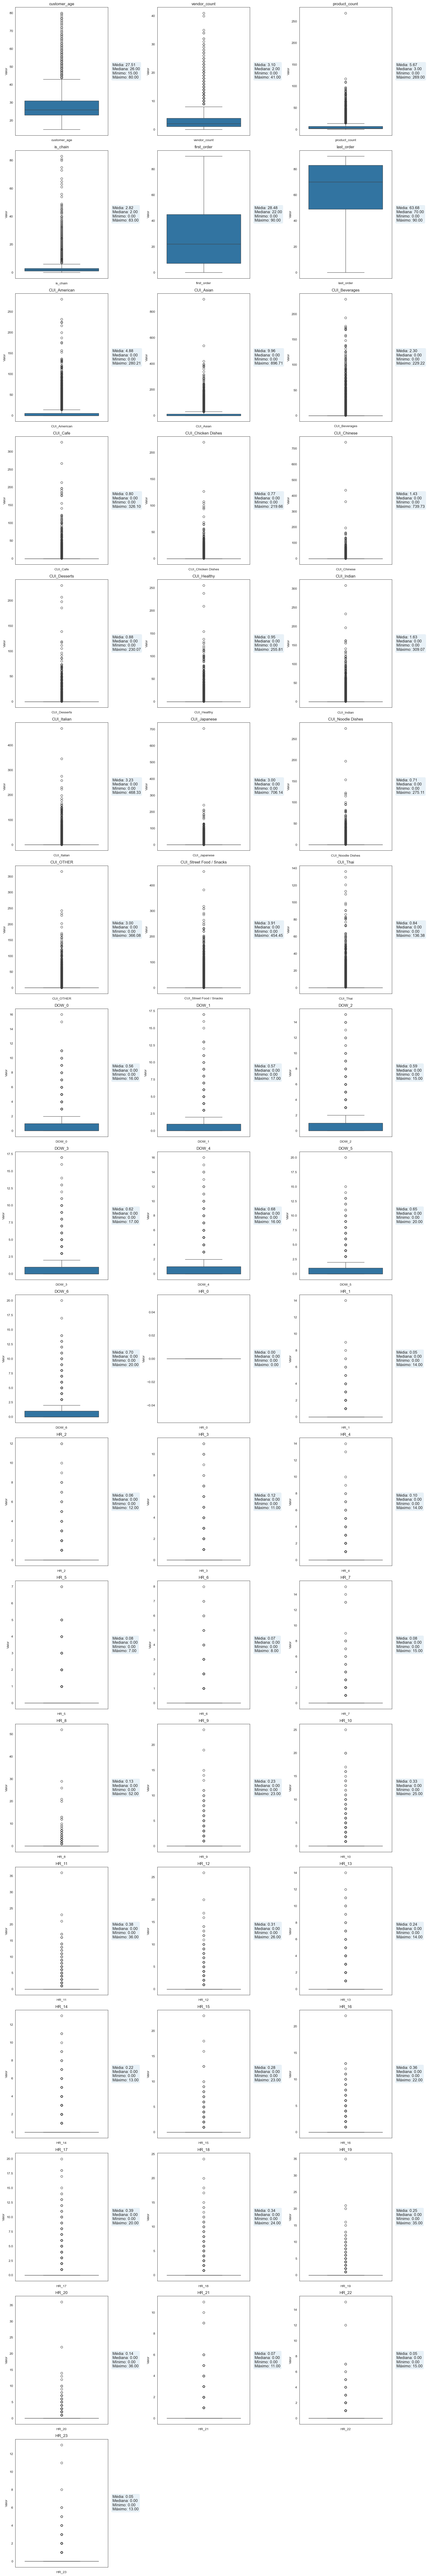

In [14]:
# Ajuste o estilo do gráfico
sns.set_style("white")

# Selecionar apenas as colunas numéricas (int64 e float64)
numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

# Definir o número de colunas que você quer por linha
n_cols = 3

# Calcular o número de linhas necessárias
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Configurar o tamanho da figura dinamicamente com base no número de linhas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Loop sobre as colunas numéricas e criar gráficos de bigode
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Valor")

    # Calcular estatísticas
    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    # Adicionar estatísticas ao lado do boxplot
    stats_text = (f'Média: {mean_value:.2f}\n'
                  f'Mediana: {median_value:.2f}\n'
                  f'Mínimo: {min_value:.2f}\n'
                  f'Máximo: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Remover eixos vazios, caso o número de variáveis seja menor que o grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os títulos e eixos
plt.tight_layout()
plt.show()

In [21]:
# Criar um pairplot
# sns.pairplot(data[number_var])
# plt.suptitle('Scatter Plots of Numerical Variables', y=1.02)  # Ajustar a posição do título
# plt.show()

2.2. Histogramas a nível relativo

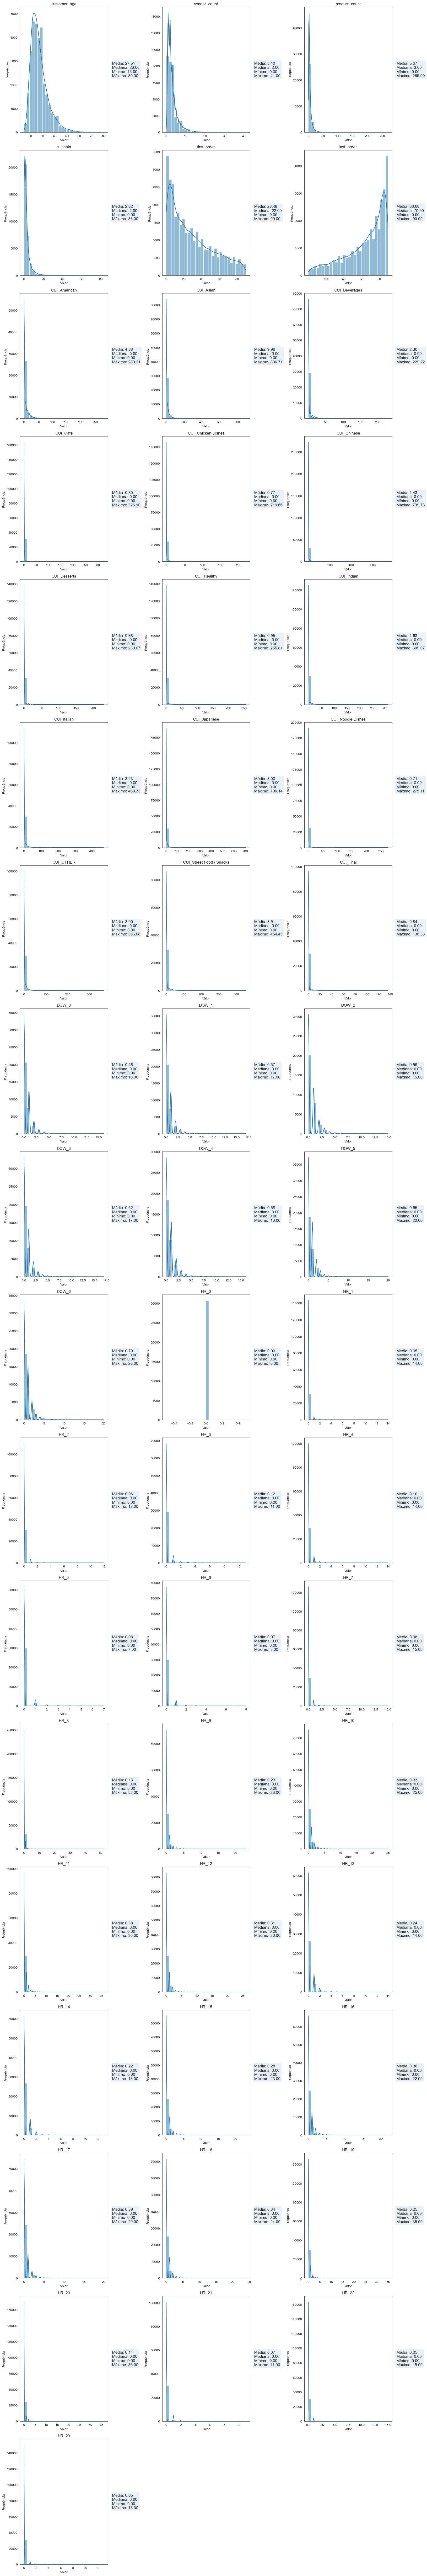

In [15]:
# Ajuste o estilo do gráfico
sns.set_style("white")

# Selecionar apenas as colunas numéricas (int64 e float64)
numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

# Definir o número de colunas que você quer por linha
n_cols = 3

# Calcular o número de linhas necessárias
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Configurar o tamanho da figura dinamicamente com base no número de linhas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Loop sobre as colunas numéricas e criar histogramas
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)  # Adicionando o KDE para visualização
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frequência")

    # Calcular estatísticas
    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    # Adicionar estatísticas ao lado do histograma
    stats_text = (f'Média: {mean_value:.2f}\n'
                  f'Mediana: {median_value:.2f}\n'
                  f'Mínimo: {min_value:.2f}\n'
                  f'Máximo: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Remover eixos vazios, caso o número de variáveis seja menor que o grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os títulos e eixos
plt.tight_layout()
plt.show()

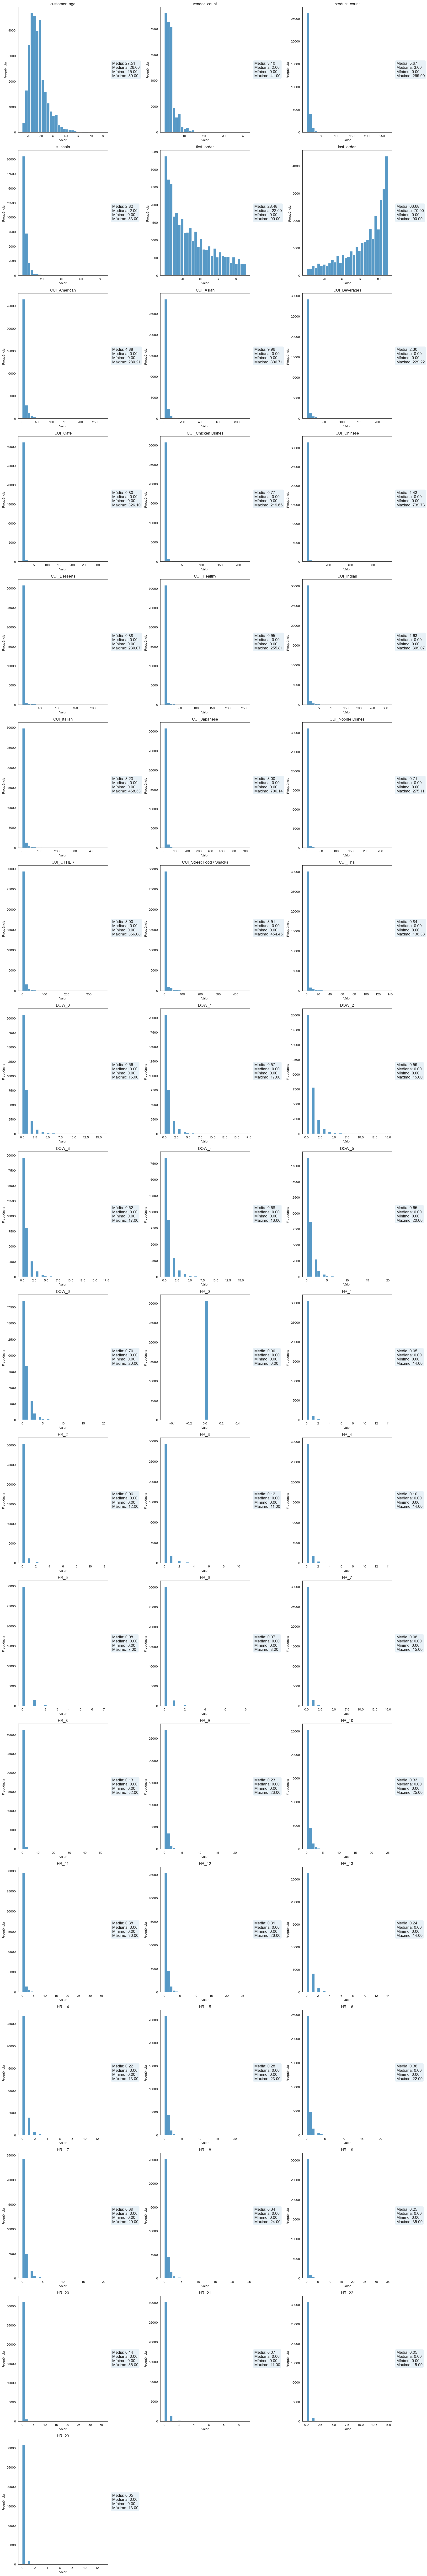

In [16]:
# Ajuste o estilo do gráfico
sns.set_style("white")

# Selecionar apenas as colunas numéricas (int64 e float64)
numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

# Definir o número de colunas que você quer por linha
n_cols = 3

# Calcular o número de linhas necessárias
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Configurar o tamanho da figura dinamicamente com base no número de linhas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten()

# Loop sobre as colunas numéricas e criar histogramas
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, ax=axes[i], stat='count')  # Usando 'stat=count' para contagens absolutas
    axes[i].set_title(col)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frequência")

    # Calcular estatísticas
    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    # Adicionar estatísticas ao lado do histograma
    stats_text = (f'Média: {mean_value:.2f}\n'
                  f'Mediana: {median_value:.2f}\n'
                  f'Mínimo: {min_value:.2f}\n'
                  f'Máximo: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

# Remover eixos vazios, caso o número de variáveis seja menor que o grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os títulos e eixos
plt.tight_layout()
plt.show()

In [17]:
unique_product_counts = data['product_count'].unique()
print(unique_product_counts)

[  5   2   3   4   6  10   8  17   7  26   9  32  15  13  16  28  19  12
  18  11  25  14  23  29  21  31  95  24  64  27  37  49  22  41  51  34
  39  20  30  47  40  53  38  54  35  33  56  65  45  63  36  79  48  70
  44  84  46  66  57  58  83 110 117 269  75  55  42  81  91  43  69  67
  72  59   1   0  77  97  87  73  76  60 109  52  62  94  80  89  61  82
  50  88  68]


In [18]:
unique_product_counts = data['is_chain'].unique()
print(unique_product_counts)

[ 1  2  0  3  5  4  7 12  6 23  8 11 20 14  9 10 16 15 13 25 17 27 30 32
 24 18 26 28 22 40 31 39 21 37 19 33 65 38 29 45 47 73 81 56 35 46 67 44
 61 34 36 49 83 75 43 42 48 63 54 80]


In [19]:
filtered_row = data[data['product_count'] == 269]
filtered_row

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
1270,92ced2dcb9,2360,23.0,40,269,81,0.0,88,-,CARD,...,4,3,8,14,7,15,9,2,2,2


**CORREALTION TABLE**

In [38]:
# Calcular a matriz de correlação
correlation_matrix = data[number_var].corr()

# Criar um DataFrame para armazenar pares de colunas e suas correlações
high_corr_pairs = []

# Iterar pela matriz de correlação
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5 or abs(correlation_matrix.iloc[i, j]) < -0.5:  # Ajuste o limite conforme necessário
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Criar um DataFrame a partir da lista de pares
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Exibir as correlações em um formato de tabela
high_corr_df

,Variable 1,Variable 2,Correlation
0,product_count,vendor_count,0.827636
1,is_chain,vendor_count,0.762916
2,is_chain,product_count,0.827071
3,DOW_0,vendor_count,0.583604
4,DOW_0,product_count,0.664765
5,DOW_0,is_chain,0.608362
6,DOW_1,vendor_count,0.581942
7,DOW_1,product_count,0.673689
8,DOW_1,is_chain,0.611363
9,DOW_2,vendor_count,0.584014


In [ ]:
# Criar coluna ou feature sobre o tempo de atividade da primeira compra á ultima registada
# data['tempo_de_atividade'] = data['last_order'] - data['first_order']